# Japan’s 50 Richest People - 2022 RANKING

https://www.forbes.com/japan-billionaires/list/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2022

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'japan-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
worth = []
industry = []

for i in range(50):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  worth.append(r.json()[i]['worth'])
  industry.append(r.json()[i]['industry'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'NetWorth': worth,
  'Industry': industry
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df.head()

,Rank,Name,NetWorth,Industry
0,1,Tadashi Yanai,23600.0,Fashion & Retail
1,2,Takemitsu Takizaki,21600.0,Manufacturing
2,3,Masayoshi Son,21100.0,Telecom
3,4,Nobutada Saji,9300.0,Food & Beverage
4,5,Takahisa Takahara,6400.0,Fashion & Retail


In [7]:
df.tail()

,Rank,Name,NetWorth,Industry
45,46,Ryuji Arai,995.0,Fashion & Retail
46,47,Shigefumi Wada,960.0,Technology
47,48,Hachiro Honjo,950.0,Food & Beverage
48,49,Masaru Wasami,940.0,Logistics
49,50,Masaru Tange,925.0,Technology


In [8]:
df.shape

(50, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      50 non-null     int64  
 1   Name      50 non-null     object 
 2   NetWorth  50 non-null     float64
 3   Industry  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [10]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50],
, ordered=False)

In [11]:
df.describe(include='object')

,Name,Industry
count,50,50
unique,50,14
top,Tadashi Yanai,Fashion & Retail
freq,1,14


In [12]:
df['Industry'].value_counts()[:20]                        # select top 20

Fashion & Retail              14
Technology                     8
Real Estate                    4
Manufacturing                  3
Food & Beverage                3
Gambling & Casinos             3
Media & Entertainment          3
Finance & Investments          3
Telecom                        2
Logistics                      2
Healthcare                     2
Construction & Engineering     1
Automotive                     1
Service                        1
Name: Industry, dtype: int64

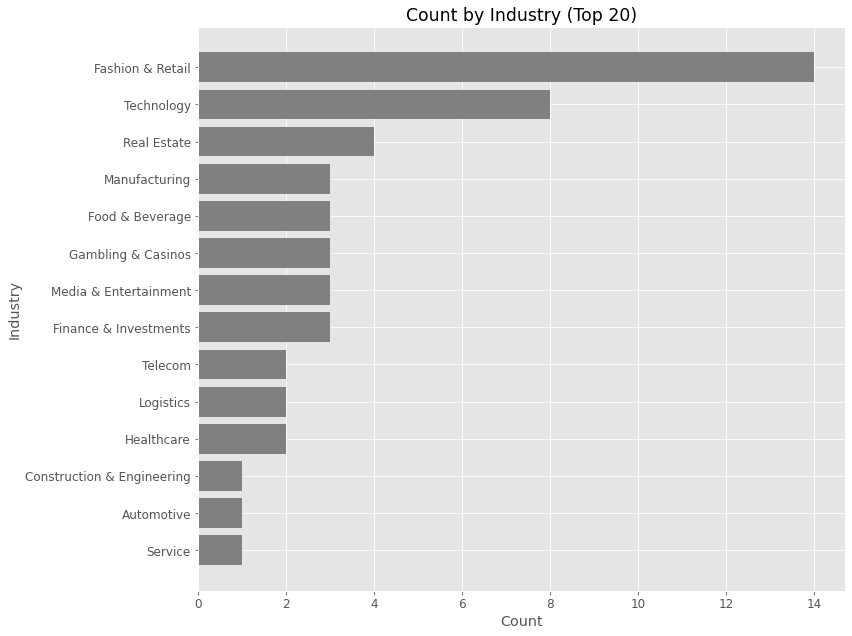

In [13]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Industry'].value_counts()[:20].keys(), width=df['Industry'].value_counts()[:20].values, color='grey', align='center')
ax.set(title='Count by Industry (Top 20)', xlabel='Count', ylabel='Industry')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [14]:
df.describe()

,NetWorth
count,50.000000
mean,3400.400000
std,5023.014872
min,925.000000
25%,1242.500000
50%,1775.000000
75%,2975.000000
max,23600.000000


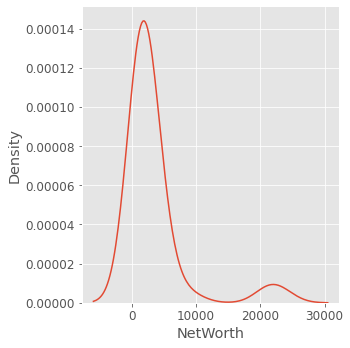

In [15]:
sns.displot(df, x='NetWorth', kind='kde')

In [16]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

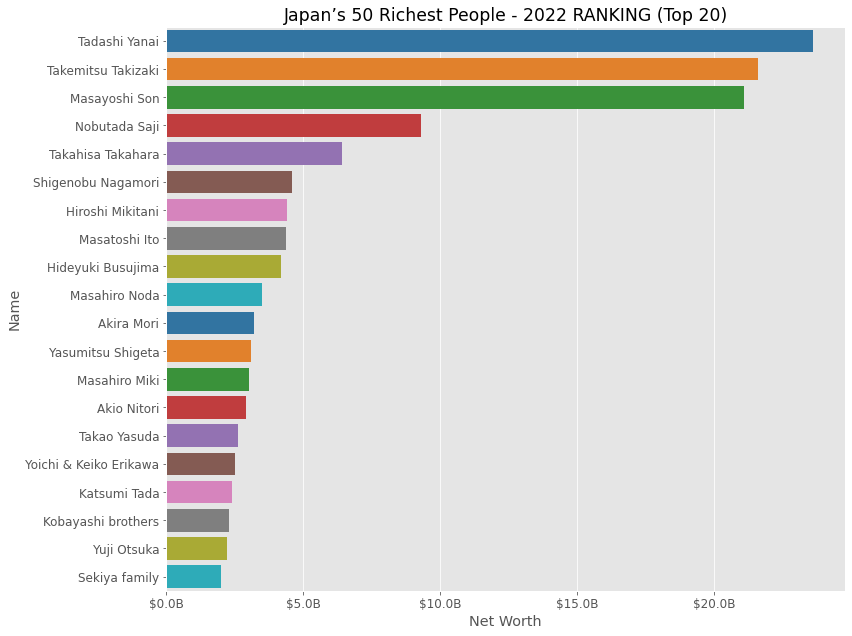

In [17]:
fig, ax = plt.subplots()
sns.barplot(
  data=df.sort_values(by='Rank', ascending=True)[:20],
  x='NetWorth', y='Name',
  palette='tab10')

ax.set(title="Japan’s 50 Richest People - 2022 RANKING (Top 20)", xlabel='Net Worth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [18]:
df.groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)

,NetWorth
Industry,
Fashion & Retail,58105.0
Manufacturing,28000.0
Telecom,24200.0
Technology,13925.0
Food & Beverage,11700.0
Real Estate,8650.0
Gambling & Casinos,6640.0
Media & Entertainment,5210.0
Finance & Investments,4590.0


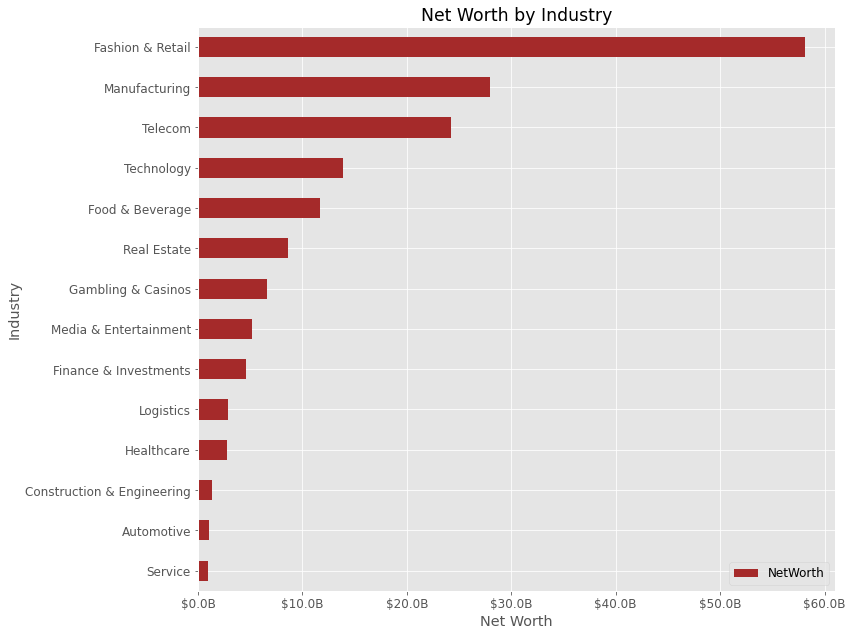

In [19]:
ax = df.groupby('Industry')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=True)\
  .plot(kind='barh', color='brown')

ax.set(title='Net Worth by Industry', xlabel='Net Worth', ylabel='Industry')
ax.xaxis.set_major_formatter(format_bill)